In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
# CSV 파일 경로 설정
file_path = 'data/건축연도_및_주택의_종류별_미거주_주택_빈집___시군구_20250604144932.csv'

# 첫 두 행은 실제 데이터가 아님 → header=None으로 전체 불러오기
df_raw = pd.read_csv(file_path, encoding='cp949', header=None)
df_raw

,0,1,2,3,4,5,6,7,8,9,10
0,행정구역별(시군구)(1),주택의 종류별(1),2015,2016,2017,2018,2019,2020,2021,2022,2023
1,행정구역별(시군구)(1),주택의 종류별(1),주택_계,주택_계,주택_계,주택_계,주택_계,주택_계,주택_계,주택_계,주택_계
2,전국,계,1068919,1120207,1264707,1419617,1517815,1511306,1395256,1451554,1534919
3,서울특별시,계,79049,94668,93343,93867,93402,96629,97000,100706,107681
4,부산광역시,계,86626,85333,94737,99458,109651,113410,101337,110500,114245
5,대구광역시,계,29610,36932,44180,40861,40721,39069,36121,43086,56673
6,인천광역시,계,47402,52941,57489,64927,66695,65861,62748,72036,84414
7,광주광역시,계,26705,29127,33569,37220,39625,41585,33439,39205,40588
8,대전광역시,계,26419,26238,26994,29900,29640,26983,26005,26262,25396
9,울산광역시,계,21423,20965,26867,29265,33114,30241,29293,29569,30900


In [3]:
# 정확한 컬럼명을 수동 지정 (2015~2023)
columns = ['지역', '주택종류', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# 3행부터 실제 데이터 시작
df = df_raw.iloc[2:].copy()
df.columns = columns

In [4]:
# 주택종류가 '계'인 행만 사용
df = df[df['주택종류'] == '계'].copy()

# 수도권 정의
capital_region = ['서울특별시', '경기도', '인천광역시']

# 수도권/비수도권/전국 구분
df['권역'] = df['지역'].apply(lambda x: '수도권' if x in capital_region else ('전국' if x == '전국' else '비수도권'))

In [5]:
# 연도 컬럼
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# 쉼표 제거 후 정수형 변환
df[years] = df[years].replace(',', '', regex=True).astype(int)

<Figure size 864x432 with 0 Axes>

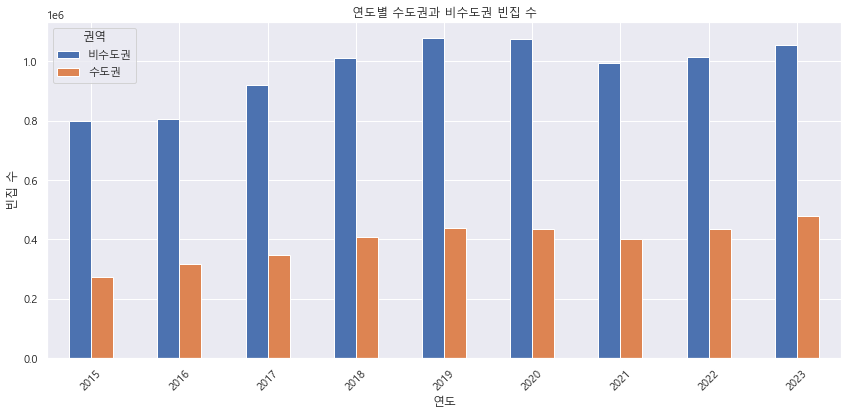

In [6]:
import matplotlib.pyplot as plt

# '전국' 제외하고 수도권/비수도권만 연도별 합계 계산
df_grouped = df[df['지역'] != '전국'].groupby('권역')[years].sum().T
df_grouped.index.name = '연도'

# 그래프 1: 수도권 vs 비수도권 연도별 빈집 수
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar')
plt.title('연도별 수도권과 비수도권 빈집 수')
plt.ylabel('빈집 수')
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

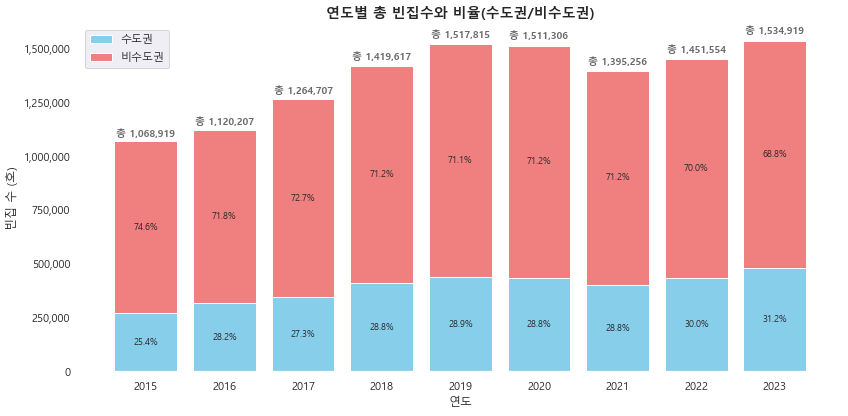

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 데이터
years = df_grouped.index.tolist()
capital = df_grouped['수도권']
non_capital = df_grouped['비수도권']
totals = capital + non_capital

# 전국 빈집 수 추출 (비율 계산용)
df_nationwide = df[df['지역'] == '전국'][years].T
df_nationwide.columns = ['전국']
df_nationwide.index.name = '연도'

# 그래프 시작
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')

# stacked bar
bar1 = ax.bar(years, capital, label='수도권', color='skyblue')
bar2 = ax.bar(years, non_capital, bottom=capital, label='비수도권', color='lightcoral')

# ✅ 막대 내부: 수도권/비수도권 비율 표시
for i, year in enumerate(years):
    national_total = df_nationwide.loc[year, '전국']
    cap_ratio = (capital[i] / national_total) * 100
    noncap_ratio = (non_capital[i] / national_total) * 100

    ax.text(i, capital[i] / 2, f'{cap_ratio:.1f}%', ha='center', va='center', fontsize=9)
    ax.text(i, capital[i] + non_capital[i] / 2, f'{noncap_ratio:.1f}%', ha='center', va='center', fontsize=9)

# ✅ 막대 위: 총합 빈집 수 표시
for i, total in enumerate(totals):
    ax.text(i, total + total * 0.02, f'총 {total:,}', ha='center',
            fontsize=10, fontweight='bold', color='dimgray')

# y축 설정
ax.set_facecolor('white')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(250000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 기타 설정
ax.set_title('연도별 총 빈집수와 비율(수도권/비수도권)', fontsize=14, fontweight='bold')
ax.set_xlabel('연도')
ax.set_ylabel('빈집 수 (호)')
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

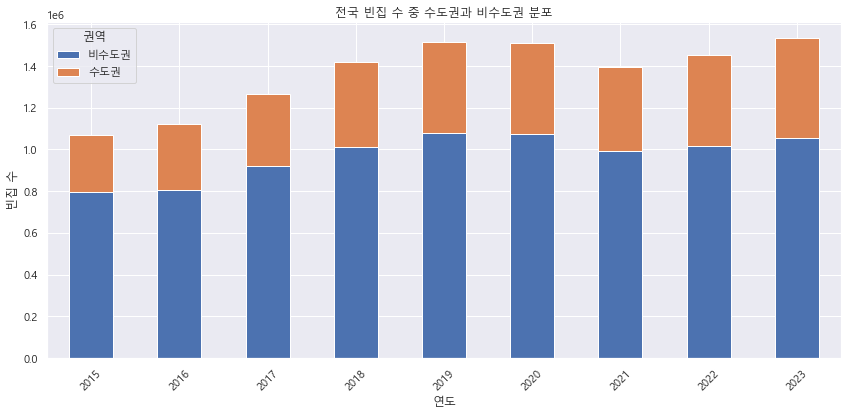

In [7]:
# 전국 합계
df_total = df[df['지역'] == '전국'][years].T
df_total.columns = ['전국']
df_total.index.name = '연도'

# 그래프 2: 전국 빈집 수를 수도권/비수도권으로 나눈 stacked bar
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=True)
plt.title('전국 빈집 수 중 수도권과 비수도권 분포')
plt.ylabel('빈집 수')
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

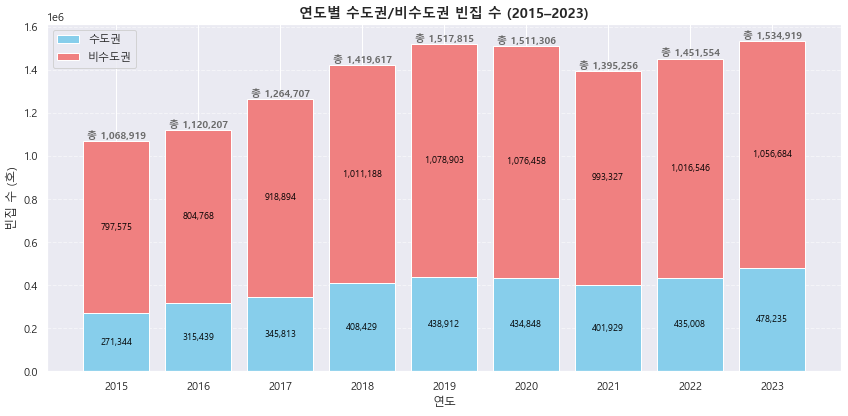

In [8]:
import matplotlib.pyplot as plt

# 데이터 준비
years = df_grouped.index.tolist()
capital = df_grouped['수도권']
non_capital = df_grouped['비수도권']
totals = capital + non_capital

# 그래프 그리기
plt.figure(figsize=(12, 6))
bar1 = plt.bar(years, capital, label='수도권', color='skyblue')
bar2 = plt.bar(years, non_capital, bottom=capital, label='비수도권', color='lightcoral')

# 각 막대 안에 수치 넣기
for i, year in enumerate(years):
    # 수도권 값 중앙
    plt.text(i, capital[i] / 2, f'{capital[i]:,}', ha='center', va='center', fontsize=9, color='black')
    # 비수도권 값 중앙 (capital 위에서)
    plt.text(i, capital[i] + non_capital[i] / 2, f'{non_capital[i]:,}', ha='center', va='center', fontsize=9, color='black')
    # 총합은 막대 위에
    plt.text(i, totals[i] + 1000, f'총 {totals[i]:,}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='dimgray')

# 제목 및 스타일
plt.title('연도별 수도권/비수도권 빈집 수 (2015–2023)', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('빈집 수 (호)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


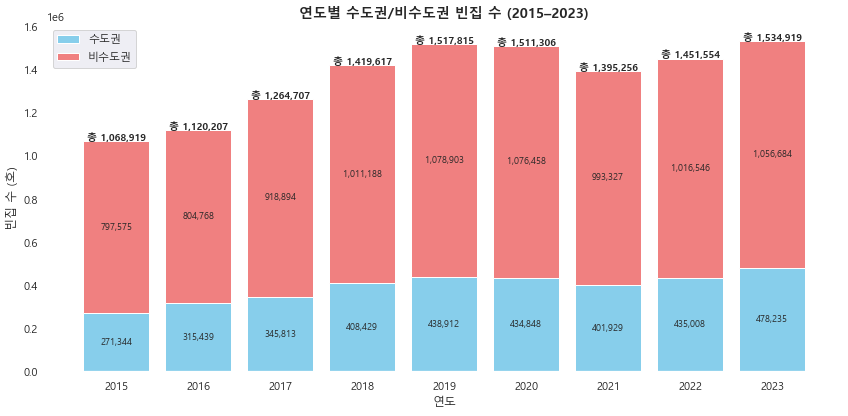

In [11]:
plt.figure(figsize=(12, 6), facecolor='white')  # 전체 배경 흰색
bar1 = plt.bar(years, capital, label='수도권', color='skyblue')
bar2 = plt.bar(years, non_capital, bottom=capital, label='비수도권', color='lightcoral')

# 내부 수치 + 총합 표시
for i, year in enumerate(years):
    plt.text(i, capital[i] / 2, f'{capital[i]:,}', ha='center', va='center', fontsize=9)
    plt.text(i, capital[i] + non_capital[i] / 2, f'{non_capital[i]:,}', ha='center', va='center', fontsize=9)
    plt.text(i, capital[i] + non_capital[i] + 1000, f'총 {totals[i]:,}', ha='center', fontsize=10, fontweight='bold')

# 축 배경도 흰색으로
ax = plt.gca()
ax.set_facecolor('white')  # 플롯 안 배경

# 기타 설정
plt.title('연도별 수도권/비수도권 빈집 수 (2015–2023)', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('빈집 수 (호)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


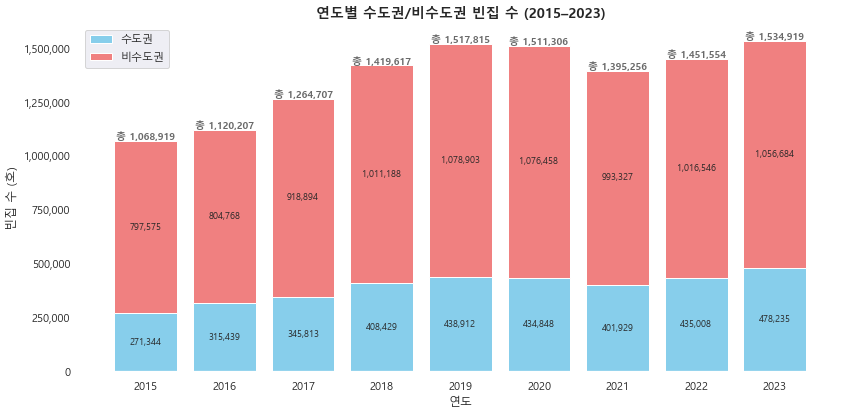

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 데이터
years = df_grouped.index.tolist()
capital = df_grouped['수도권']
non_capital = df_grouped['비수도권']
totals = capital + non_capital

# 전체 배경 흰색
plt.figure(figsize=(12, 6), facecolor='white')

# Stacked bar
bar1 = plt.bar(years, capital, label='수도권', color='skyblue')
bar2 = plt.bar(years, non_capital, bottom=capital, label='비수도권', color='lightcoral')

# 축 설정
ax = plt.gca()
ax.set_facecolor('white')
ax.grid(axis='y', linestyle='--', alpha=0.5)

# ✅ y축 눈금 단위: 250,000 단위 + 쉼표 포함
ax.yaxis.set_major_locator(ticker.MultipleLocator(250000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 값 표기
for i, year in enumerate(years):
    plt.text(i, capital[i] / 2, f'{capital[i]:,}', ha='center', va='center', fontsize=9)
    plt.text(i, capital[i] + non_capital[i] / 2, f'{non_capital[i]:,}', ha='center', va='center', fontsize=9)
    plt.text(i, totals[i] + 5000, f'총 {totals[i]:,}', ha='center', fontsize=10, fontweight='bold', color='dimgray')

# 제목 및 축
plt.title('연도별 수도권/비수도권 빈집 수 (2015–2023)', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('빈집 수 (호)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()
